In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [15]:
# ACT = xr.open_dataset('../Data/ACTtransport_insitu.nc')
ACT2 = xr.open_dataset('../Data/ACTtransport_insitu2.nc')
# ACT['time'][4]
ACT2['time'][3]

<xarray.DataArray 'time' ()>
array('2010-04-19T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2010-04-19
Attributes:
    long_name:      UTC time
    standard_name:  time
    axis:           T

In [35]:
ACT = xr.open_dataset('../Data/ACTtransport_insitu.nc')
# ACT = ((ACT.Tbox/1000000)*-1).resample(time='1d').mean()
ACT = ((ACT.Tbox/1000000)).resample(time='1d').mean()
ACT = ACT.sel(time=slice('2010-04-17', '2012-04-08'))
free = xr.open_dataset('../Data/hycomFREE_transports_ACT.nc')
free = free.sel(time=slice('2010-04-17', '2012-04-08'))
cci = xr.open_dataset('../Data/hycomCCI_transports_ACT.nc')
cci = cci.sel(time=slice('2010-04-17', '2012-04-08'))
ostia = xr.open_dataset('../Data/hycomOSTIA_transports_ACT.nc')
ostia = ostia.sel(time=slice('2010-04-17', '2012-04-08'))

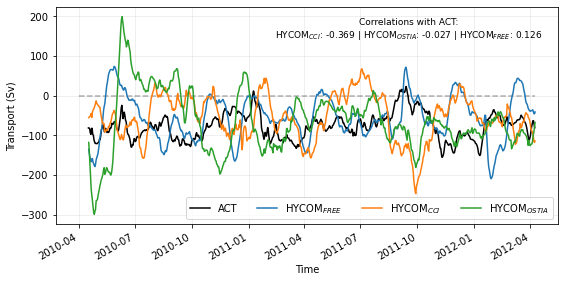

In [44]:
# # calculating correlations
corr_cciact = round(np.corrcoef(cci.transport[:,0],ACT)[0,1],3)
corr_ostiaact = round(np.corrcoef(ostia.transport[:,0],ACT)[0,1],3)
corr_freeact = round(np.corrcoef(free.transport[:,0],ACT)[0,1],3)
textbox = 'Correlations with ACT:\nHYCOM$_{CCI}$: ' + '{0}'.format(corr_cciact) +  ' | HYCOM$_{OSTIA}$: ' + '{0}'.format(corr_ostiaact) +  ' | HYCOM$_{FREE}$: ' + '{0}'.format(corr_freeact)

fig = plt.figure(figsize=(9,4))
plt.hlines(0,xmin=pd.to_datetime('2010-04-01'), xmax=pd.to_datetime('2012-04-08'), linestyle='dashed', alpha=0.3)
# plt.vlines(pd.to_datetime('2011-09-28'),ymin=-90, ymax=250, color='red', linestyle='dotted', linewidth=2, alpha=0.85)
# plt.vlines(pd.to_datetime('2011-07-03'),ymin=-90, ymax=250, color='green', linestyle='dotted', linewidth=2, alpha=0.85)
ACT.plot(label='ACT', color='k')
free.transport.plot(label='HYCOM$_{FREE}$')
cci.transport.plot(label='HYCOM$_{CCI}$')
ostia.transport.plot(label='HYCOM$_{OSTIA}$')
plt.grid(alpha=0.25)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time')
# fig.text(0.72, 0.88, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
fig.text(0.67, 0.8, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center', transform=fig.transFigure)
plt.legend(ncol=4, loc='lower right')
plt.savefig('../Figures/act/Trans_tbox_new.png', dpi=300, bbox_inches='tight', format='png')

In [37]:
cci

<xarray.Dataset>
Dimensions:           (N_2: 2, section: 1, time: 723)
Coordinates:
  * time              (time) datetime64[ns] 2010-04-17T12:00:00 ... 2012-04-08T12:00:00
Dimensions without coordinates: N_2, section
Data variables:
    sectionname       (section) |S20 ...
    section_lon       (section, N_2) float32 ...
    section_lat       (section, N_2) float32 ...
    transport         (time, section) float32 ...
    transport_neg     (time, section) float32 ...
    transport_pos     (time, section) float32 ...
    icetransport      (time, section) float32 ...
    icetransport_neg  (time, section) float32 ...
    icetransport_pos  (time, section) float32 ...
Attributes:
    title:        TOPAZ transport across sections
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    references:   http://topaz.nersc.no
    comment:      Transports are defined as positive if it is towards the rig...

In [7]:
HYCOMcci.where(HYCOMcci.transport==HYCOMcci.transport.max(), drop=True).squeeze()

<xarray.Dataset>
Dimensions:           (N_2: 2)
Coordinates:
    time              datetime64[ns] 2011-09-28T12:00:00
Dimensions without coordinates: N_2
Data variables:
    sectionname       object b'ACT_ARRAY           '
    section_lon       (N_2) float32 27.76488 28.905796
    section_lat       (N_2) float32 -33.59943 -35.54219
    transport         float32 238.82446
    transport_neg     float32 -0.9523389
    transport_pos     float32 239.7768
    icetransport      float32 0.0
    icetransport_neg  float32 0.0
    icetransport_pos  float32 0.0
Attributes:
    title:        TOPAZ transport across sections
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    references:   http://topaz.nersc.no
    comment:      Transports are defined as positive if it is towards the rig...

In [8]:
HYCOMcci.where(HYCOMcci.transport==HYCOMcci.transport.min(), drop=True).squeeze()

<xarray.Dataset>
Dimensions:           (N_2: 2)
Coordinates:
    time              datetime64[ns] 2011-07-03T12:00:00
Dimensions without coordinates: N_2
Data variables:
    sectionname       object b'ACT_ARRAY           '
    section_lon       (N_2) float32 27.76488 28.905796
    section_lat       (N_2) float32 -33.59943 -35.54219
    transport         float32 -67.48152
    transport_neg     float32 -109.96445
    transport_pos     float32 42.482925
    icetransport      float32 0.0
    icetransport_neg  float32 0.0
    icetransport_pos  float32 0.0
Attributes:
    title:        TOPAZ transport across sections
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    references:   http://topaz.nersc.no
    comment:      Transports are defined as positive if it is towards the rig...

In [ ]:
# read SST datasets
